In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
ibm_token = os.getenv("IBM_TOKEN")
crn = os.getenv("CRN")

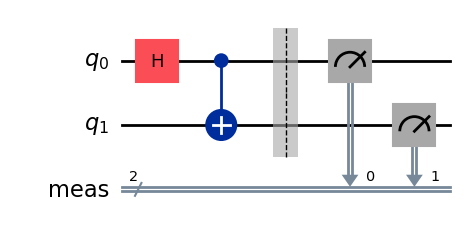

In [3]:
qc = QuantumCircuit(2)
qc.h(0); qc.cx(0,1); qc.measure_all()
qc.draw('mpl')

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=ibm_token,
    overwrite=True,
    instance=crn
)
service = QiskitRuntimeService(channel="ibm_quantum_platform")
print(service.backends())

[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


In [6]:
backend = service.backend("ibm_fez", instance=crn)
noise_model = NoiseModel.from_backend(backend)
sim = AerSimulator(noise_model=noise_model)

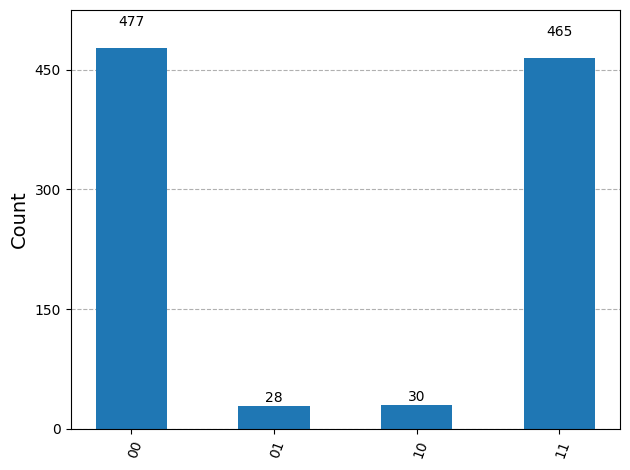

In [7]:
tqc = transpile(qc, backend=sim, optimization_level=1)
job = sim.run(tqc, shots=1000, seed_simulator=1337)
result = job.result()
plot_histogram(result.get_counts())

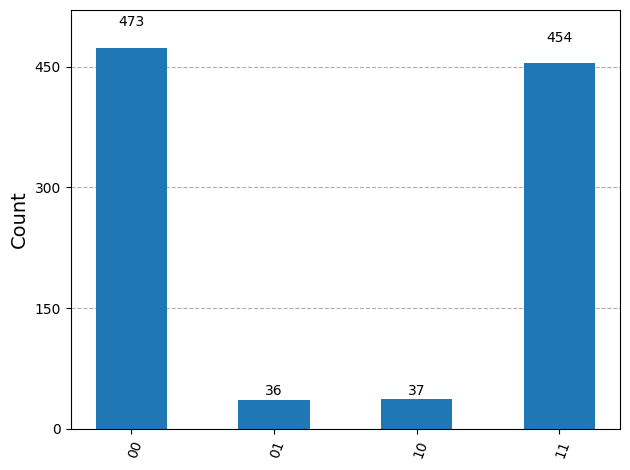

In [10]:
tqc = transpile(
    qc,
    backend=backend,
    optimization_level=1, 
    seed_transpiler=42 # transpiler i stochastic, so we set the seed to ensure compiled circuit is always the same
)
backend = service.backend("ibm_fez")
sampler = SamplerV2(backend)
job = sampler.run([tqc], shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()
plot_histogram(counts)